#  Deep Learning with hidden layer Neural Network (Binary Classification)

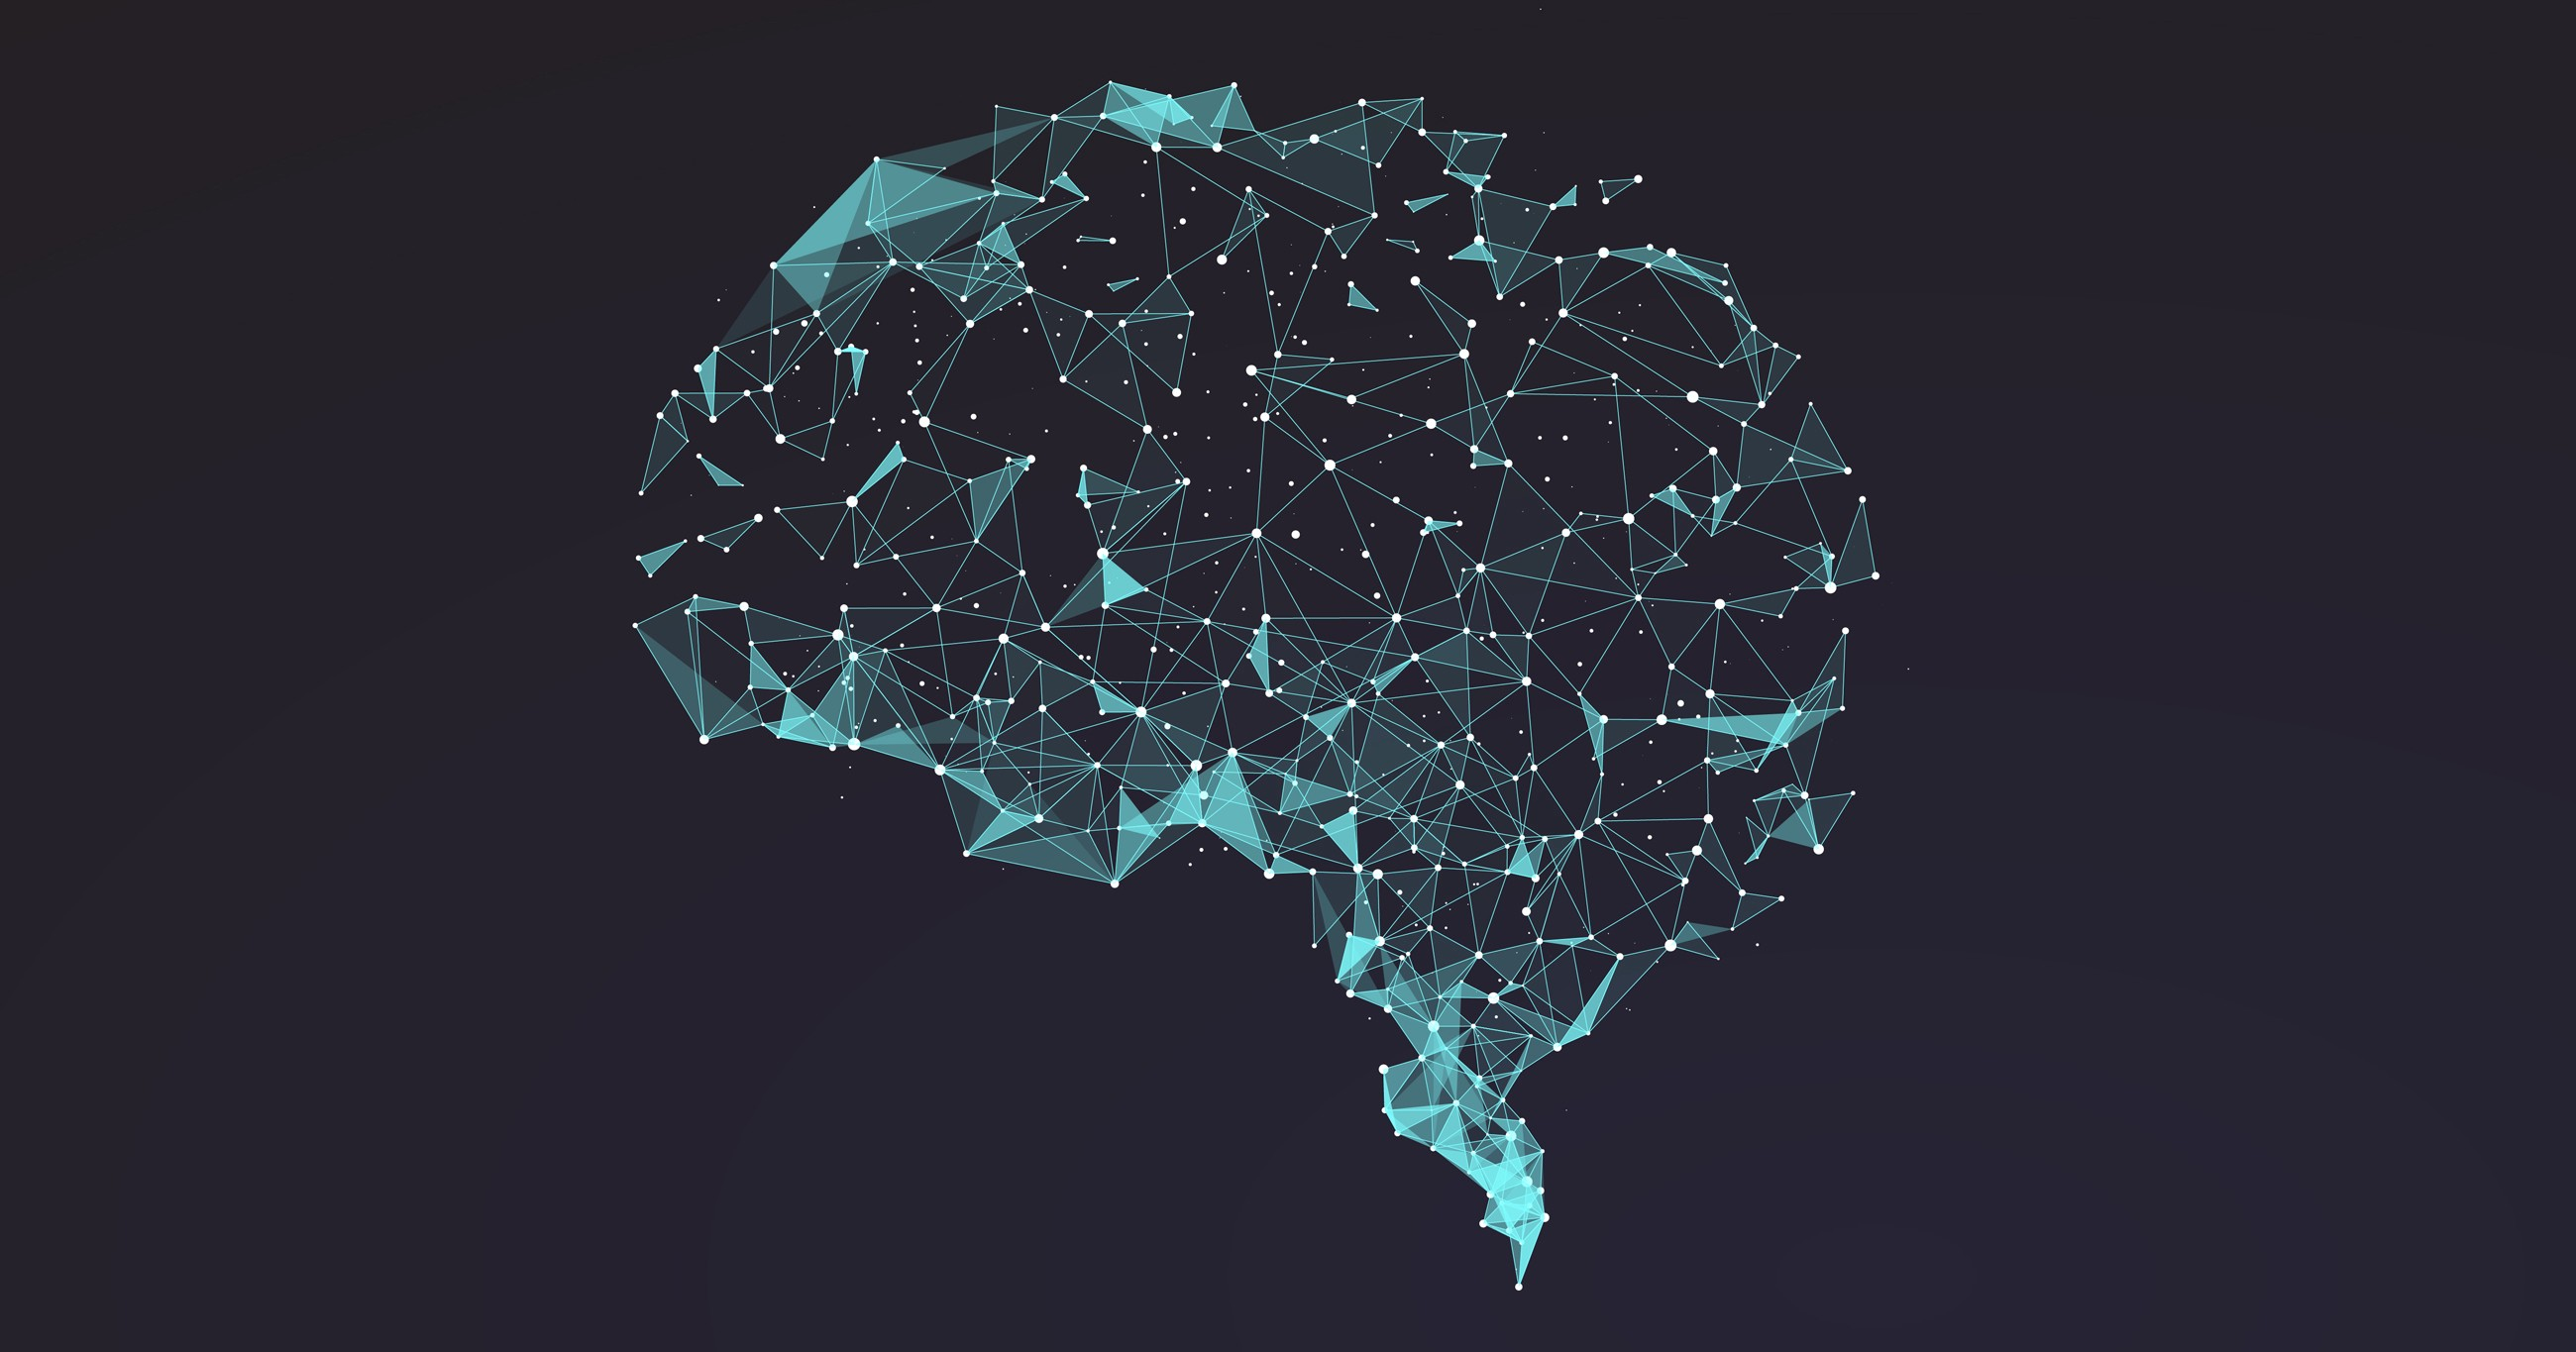

# Heart attack analysis 

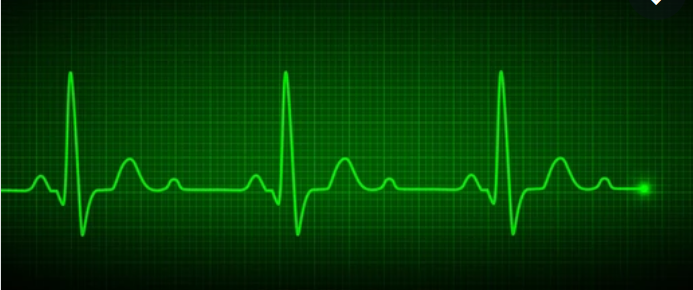

# Parameters on this analysis

#### age: The person’s age in years
#### sex: The person’s sex (1 = male, 0 = female)
#### cp: chest pain type
— Value 0: asymptomatic
— Value 1: atypical angina
— Value 2: non-anginal pain
— Value 3: typical angina
#### trestbps: The person’s resting blood pressure (mm Hg)
#### chol: The person’s cholesterol measurement in mg/dl
#### fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
#### restecg: resting electrocardiographic results
— Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
— Value 1: normal
— Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#### thalach: The person’s maximum heart rate achieved
#### exang: Exercise induced angina (1 = yes; 0 = no)
#### oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)
#### slope: the slope of the peak exercise ST segment 
0: downsloping; 
1: flat;
2: upsloping
#### ca: The number of major blood vessels blocked(0–3)
#### thal: A blood disorder called thalassemia 
Value 0: NULL 
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)

#          Load Traindata

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
df=pandas.read_excel("C:/DL_program/Heart Attack Prediction/heart.xlsx")
arr=[]
col=len(df.iloc[0,:])
for i in range(col-1):
    arr.append(list(df.iloc[:,i]))
train_X=np.array(arr)
train_Y=np.array(list(df.iloc[:,col-1]))

In [2]:
def normalisation(X):
    m=X.shape[1]
    temp=(1/m)*np.sum(X,axis=1,keepdims=True)
    maximum = np.amax(X,axis=1,keepdims=True)
    minimum = np.amin(X,axis=1,keepdims=True)
    X = X - temp
    temp1 = maximum - minimum
    X = np.divide(X,temp1)
    return X

In [3]:
train_X=normalisation(train_X)

# Initialisation of Parameters

In [4]:
def initialize(layerdim):
    params={}
    for i in range(1,len(layerdim)):
        params["W"+str(i)]=np.random.randn(layerdim[i],layerdim[i-1])*0.009
        params["b"+str(i)]=np.zeros((layerdim[i],1))
    return params


# Activation Function

In [5]:
def sigmoid(Z):
    return (1/(1+np.exp(-Z)))
def tanh(Z):
    return np.tanh(Z)

# Forward Propagation

In [6]:
def forwardprop(params,X):
    cache={}
    cache["A0"]=X
    layer=len(params)//2
    for i in range(1,layer+1):
        Zl = np.dot(params["W"+str(i)],cache["A"+str(i-1)])+params["b"+str(i)]
        if (i!=layer):
            Al = tanh(Zl)
        else:
            Al = sigmoid(Zl)
        cache["Z"+str(i)]=Zl
        cache["A"+str(i)]=Al
    return cache

# Cost

In [7]:
def computecost(Y,AL):
    m=len(Y)
    cost = (1/m)*np.sum(-(Y*np.log(AL)+(1-Y)*np.log(1-AL)),axis=1,keepdims=True)
    return cost

# Derivative

In [8]:
def sigmoid_derivative(zl):
    al = sigmoid(zl)
    return al*(1-al)

def tanh_derivative(zl):
    al = tanh(zl)
    return (1-al*al)

# Backpropagation

In [9]:
def backprop(cache,params,X,Y):
    grads={}
    m = len(Y)
    L = len(params)//2
    AL = cache["A"+str(L)]
    dAL = -np.divide(Y,AL)+np.divide((1-Y),(1-AL))
    grads["dA"+str(L)]=dAL
    for i in reversed(range(1,L+1)):
        dal = grads["dA"+str(i)]
        if (i==L):
            dzl = dal*sigmoid_derivative(cache["Z"+str(i)])
        else:
            dzl = dal*tanh_derivative(cache["Z"+str(i)])
        dwl = (1/m)*np.dot(dzl,cache["A"+str(i-1)].T)
        dbl = (1/m)*np.sum(dzl,axis=1,keepdims=True)
        grads["dW"+str(i)] = dwl
        grads["db"+str(i)] = dbl
        grads["dA"+str(i-1)] = np.dot(params["W"+str(i)].T,dzl)
    return grads

# Gradient Decent

In [10]:
def gradient_decent(grads,params,learning_rate):
    L = len(params)//2
    for i in reversed(range(1,L+1)):
        wl = params["W"+str(i)] 
        dwl = grads["dW"+str(i)]
        wl = wl - learning_rate*dwl
        bl = params["b"+str(i)] 
        dbl = grads["db"+str(i)]
        bl = bl - learning_rate*dbl
        
        params["W"+str(i)]=wl
        params["b"+str(i)]=bl
        
    return params

# Iteration

cost after 1000 iteration : [[0.34525453]]
cost after 2000 iteration : [[0.28829256]]
cost after 3000 iteration : [[0.17322073]]
cost after 4000 iteration : [[0.08475143]]
cost after 5000 iteration : [[0.02638033]]
cost after 6000 iteration : [[0.00954552]]
cost after 7000 iteration : [[0.0043272]]
cost after 8000 iteration : [[0.00248509]]


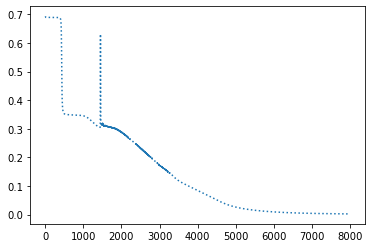

In [57]:
layerdim = [len(train_X),20,10,1]
learning_rate = 0.1
params = initialize(layerdim)
iteration=[]
costs=[]
for i in range(1,8001):
    iteration.append(i)
    cache = forwardprop(params,train_X)
    cost = computecost(train_Y,cache["A"+str(len(cache)//2)])
    costs.append(np.squeeze(cost))
    if (i%1000==0):
        print("cost after "+str(i)+" iteration : "+str(cost))
    grads = backprop(cache,params,train_X,train_Y)
    params=gradient_decent(grads,params,rate)
plt.plot(iteration,costs,":")
plt.show()
prediction = forwardprop(params,train_X)
pr_Y = prediction["A"+str(len(prediction)//2)]

# Train Accuracy

In [58]:
def prediction(pr_Y):
    pr_Y[pr_Y>=0.5]=1
    pr_Y[pr_Y<0.5]=0
    return pr_Y

In [59]:
pr_Y = prediction(pr_Y)
m = len(train_Y)
accuracy = np.average(train_Y==pr_Y)*100
print("Train accuracy : "+str(accuracy))

Train accuracy : 100.0


## 100% Train accuracy achieved with 3 layer Neural Network and learning rate 0.1

# From here we can predict the expected value for given test data set

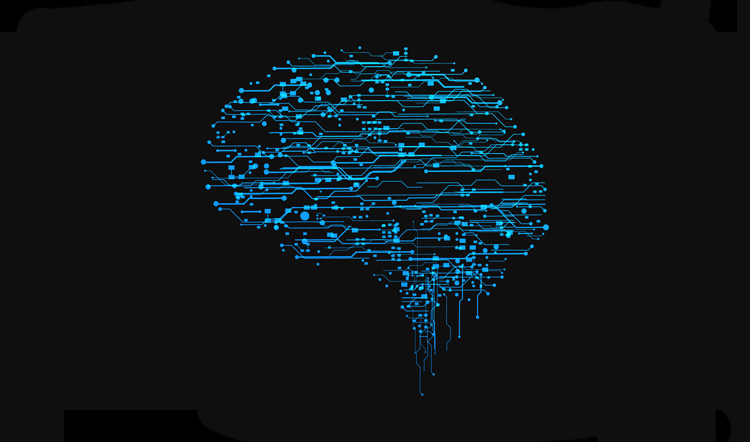

## Prepared By - 
Kusal Bhattacharyya

Electronics and Tele-communication Engineering Department

Jadavpur University

UG I